### Bollinger Bands

* Middle Band = $N-th$ Moving Average 
* Upper Band = $N-th$ Moving Average + $K\sigma$ $\quad$($N+K\sigma$) 
* Lower Band = $N-th$ Moving Average - $K\sigma$ $\quad$($N-K\sigma$) 

where values of $N$ and $K$ are usually chosen to be $20$ and $2$ respectively and usually a *simple-moving-average* is used however *exponential* is also an option

In [9]:
#!pip3 install import_ipynb
#!pip3 install mpl_finance

In [5]:
import import_ipynb
import get_data as get

import pandas as pd
import numpy as np 
import os 
import matplotlib.pyplot as plt
from timeit import default_timer as timer

importing Jupyter notebook from get_data.ipynb


                  High         Low        Open       Close     Volume  \
Date                                                                    
2019-02-04  134.149994  132.210007  133.960007  132.880005  7759000.0   
2019-02-05  133.880005  132.750000  133.520004  132.880005  6449800.0   
2019-02-06  133.570007  132.300003  133.080002  133.000000  5066100.0   
2019-02-07  132.639999  131.529999  132.449997  132.050003  6085300.0   
2019-02-08  132.460007  131.539993  131.949997  132.399994  4436700.0   

             Adj Close   LB 20 day      MB/sma   UB 20 day  
Date                                                        
2019-02-04  132.880005  127.128940  129.740001  132.351061  
2019-02-05  132.880005  127.914320  130.033501  132.152682  
2019-02-06  133.000000  128.404999  130.185500  131.966001  
2019-02-07  132.050003  128.685008  130.341501  131.997994  
2019-02-08  132.399994  128.751263  130.476000  132.200737  

Time taken to run the code: 0.25



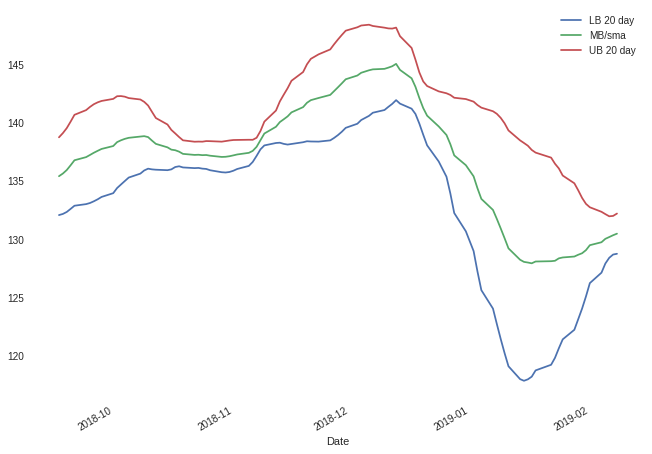

In [10]:
start = timer()

def BB(ticker,N=20,K=2,MA_type = 'sma'):
    
    df = pd.DataFrame()
    
    if os.path.exists('stock_dfs/{}.csv'.format(ticker)):
        data = pd.read_csv('stock_dfs/{}.csv'.format(ticker),
                 parse_dates=True,index_col=0)
        
        if ('LB {} day'.format(N),
            'MB/{}'.format(MA_type),'UB {} day'.format(N)) not in data.columns:
            
            df_adj = data['Adj Close']
            
            if MA_type == 'ema':
                mean = get.exponential_moving_average(df_adj,window = N)
            elif MA_type == 'sma': 
                mean = get.simple_moving_average(df_adj,window = N)
            else:
                print("MA_type only takes the string 'ema' and 'sma' but {} was given".format(MA_type))
                
            std = mean.rolling(window=N).std()
            
            upper = mean + K*std
            lower = mean - K*std
    
            get.add_col(lower,ticker,heading = 'LB {} day'.format(N))
            get.add_col(mean,ticker,heading = 'MB/{}'.format(MA_type))
            get.add_col(upper,ticker,heading = 'UB {} day'.format(N))
            
        else:
            print('{} Bollinger bands already exists in {}.csv\nExtracting now...'.format(ticker))
            
    else:
        print('{} is being extracting from yahoo finance API...'.format(ticker))
        get.get_data(ticker); 
        data = pd.read_csv('stock_dfs/{}.csv'.format(ticker),
                 parse_dates=True,index_col=0)
        
        df_adj = data['Adj Close']
            
        if MA_type == 'ema':
            mean = get.exponential_moving_average(df_adj,window = N)
        elif MA_type == 'sma': 
            mean = get.simple_moving_average(df_adj,window = N)
        else:
            print("MA_type only takes the string 'ema' and 'sma' but {} was given".format(MA_type))

        std = mean.rolling(window=N).std()

        upper = mean + K*std
        lower = mean - K*std

        get.add_col(lower,ticker,heading = 'LB {} day'.format(N))
        get.add_col(mean,ticker,heading = 'MB/{}'.format(MA_type))
        get.add_col(upper,ticker,heading = 'UB {} day'.format(N))
    
    
    if __name__=='__main__':
        
        data = pd.read_csv('stock_dfs/{}.csv'.format(ticker),
                 parse_dates=True,index_col=0)
        df = data[['LB {} day'.format(N),
            'MB/{}'.format(MA_type),'UB {} day'.format(N)]]
        
        ax1 = df[-100:].plot(figsize=(11,8))
        ax1.set_facecolor('w')
        
        print(data.tail())
    

if __name__=='__main__':    
    BB('JNJ')

    end = timer()
    time_elapsed = end - start

    print('\nTime taken to run the code: {}\n'.format(round(time_elapsed,3)))